<a href="https://colab.research.google.com/github/MinhPhanBabsonMSBA/Stock-analysis-/blob/main/Copy_of_LSTM_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - loss: 0.1593 - val_loss: 0.8585
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1232 - val_loss: 0.7229
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0856 - val_loss: 0.6079
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0666 - val_loss: 0.5074
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0483 - val_loss: 0.4203
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0333 - val_loss: 0.3460
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0217 - val_loss: 0.2832
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0176 - val_loss: 0.2315
Epoch 9/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0140 - val_loss: 0.1933
Epoch 10/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0136 - val_loss: 0.1668
Epoch 11/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0119 - val_loss: 0.1510
Epoch 12/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0111 - val_loss: 0.1423
Epoch 13/20


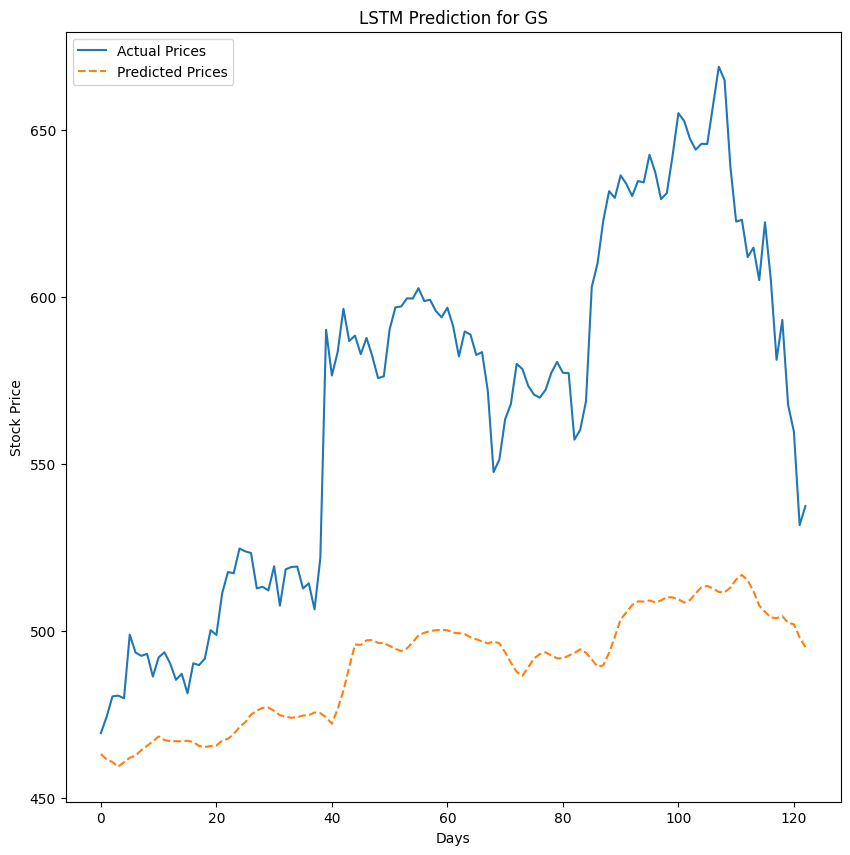

In [2]:


# Load stock data
ticker = "GS"  # Goldman Sachs example
stock = yf.Ticker(ticker)
df = stock.history(period="1y")  # Fetch last 1 year of data to reduce memory usage

# Use the closing price for prediction
df = df[['Close']]

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df)

# Prepare the dataset for LSTM
def prepare_data(data, look_back=5):  # Reduce look_back to lower memory usage
    X, y = [], []
    for i in range(look_back, len(data)):
        X.append(data[i-look_back:i, 0])
        y.append(data[i, 0])
    X, y = np.array(X), np.array(y)
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))
    return X, y

look_back = 5  # Use fewer days to reduce dataset size
X, y = prepare_data(df_scaled, look_back)

# Split data into training and test sets



train_size = int(len(X) * 0.5)  # Reduce training size to 50%
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


# Build LSTM model with fewer units to optimize memory
model = Sequential([
    LSTM(units=10, return_sequences=False, input_shape=(look_back, 1)),
    Dense(units=1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with fewer epochs and a smaller batch size
model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

# Make predictions
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot results
plt.figure(figsize=(10,10))
plt.plot(y_test, label='Actual Prices')
plt.plot(y_pred, label='Predicted Prices', linestyle='dashed')
plt.legend()
plt.title(f"LSTM Prediction for {ticker}")
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.show()




Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0154 - val_loss: 0.0568
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0045 - val_loss: 0.0231
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0022 - val_loss: 0.0131
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0027 - val_loss: 0.0148
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0021 - val_loss: 0.0190
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0019 - val_loss: 0.0193
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0018 - val_loss: 0.0161
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0026 - val_loss: 0.0125
Epoch 9/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0014 - val_loss: 0.0102
Epoch 10/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0022 - val_loss: 0.0097
Epoch 11/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0018 - val_loss: 0.0089
Epoch 12/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0019 - val_loss: 0.0072
Epoch 13/20


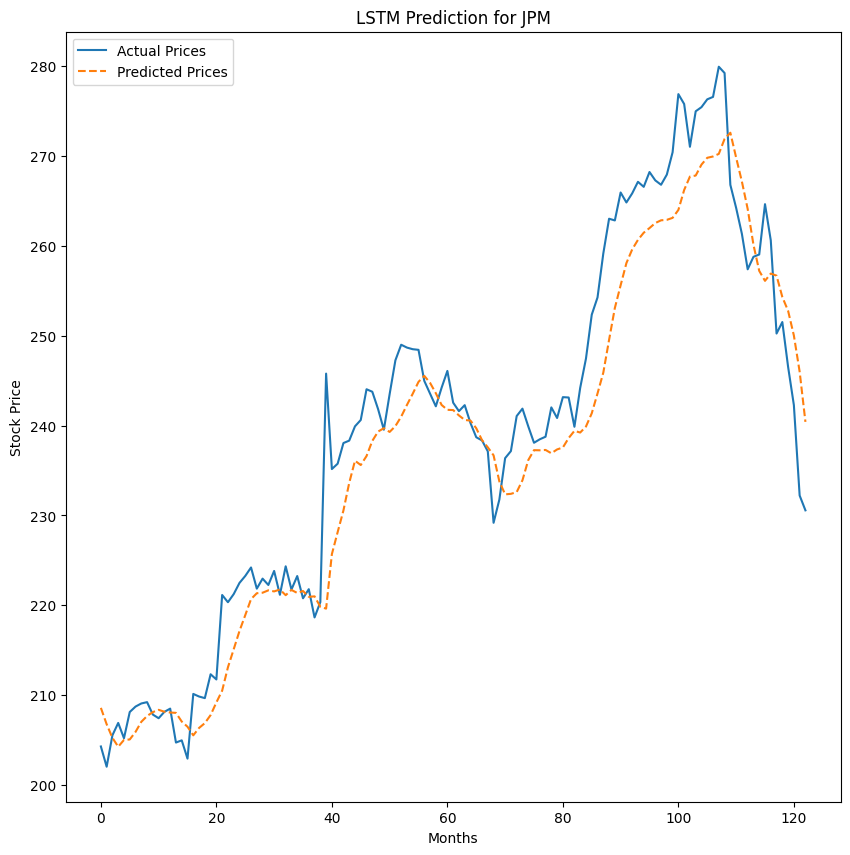

In [3]:
# Load stock data
ticker = "JPM"
stock = yf.Ticker(ticker)
df = stock.history(period="1y")  # Fetch last 1 year of data to reduce memory usage

# Use the closing price for prediction
df = df[['Close']]

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df)

# Prepare the dataset for LSTM
def prepare_data(data, look_back=5):  # Reduce look_back to lower memory usage
    X, y = [], []
    for i in range(look_back, len(data)):
        X.append(data[i-look_back:i, 0])
        y.append(data[i, 0])
    X, y = np.array(X), np.array(y)
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))
    return X, y

look_back = 5  # Use fewer days to reduce dataset size
X, y = prepare_data(df_scaled, look_back)

# Split data into training and test sets


train_size = int(len(X) * 0.5)  # Reduce training size to 50%
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


# Build LSTM model with fewer units to optimize memory
model = Sequential([
    LSTM(units=10, return_sequences= False, input_shape=(look_back, 1)),
    Dense(units=1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with fewer epochs and a smaller batch size
model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

# Make predictions
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot results
plt.figure(figsize=(10,10))
plt.plot(y_test, label='Actual Prices')
plt.plot(y_pred, label='Predicted Prices', linestyle='dashed')
plt.legend()
plt.title(f"LSTM Prediction for {ticker}")
plt.xlabel("Months")
plt.ylabel("Stock Price")
plt.show()

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0459 - val_loss: 0.4981
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0307 - val_loss: 0.3854
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0193 - val_loss: 0.2980
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0099 - val_loss: 0.2312
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0057 - val_loss: 0.1844
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0042 - val_loss: 0.1543
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0033 - val_loss: 0.1365
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0040 - val_loss: 0.1291
Epoch 9/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0039 - val_loss: 0.1290
Epoch 10/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0039 - val_loss: 0.1285
Epoch 11/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0039 - val_loss: 0.1259
Epoch 12/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0035 - val_loss: 0.1197
Epoch 13/20


1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


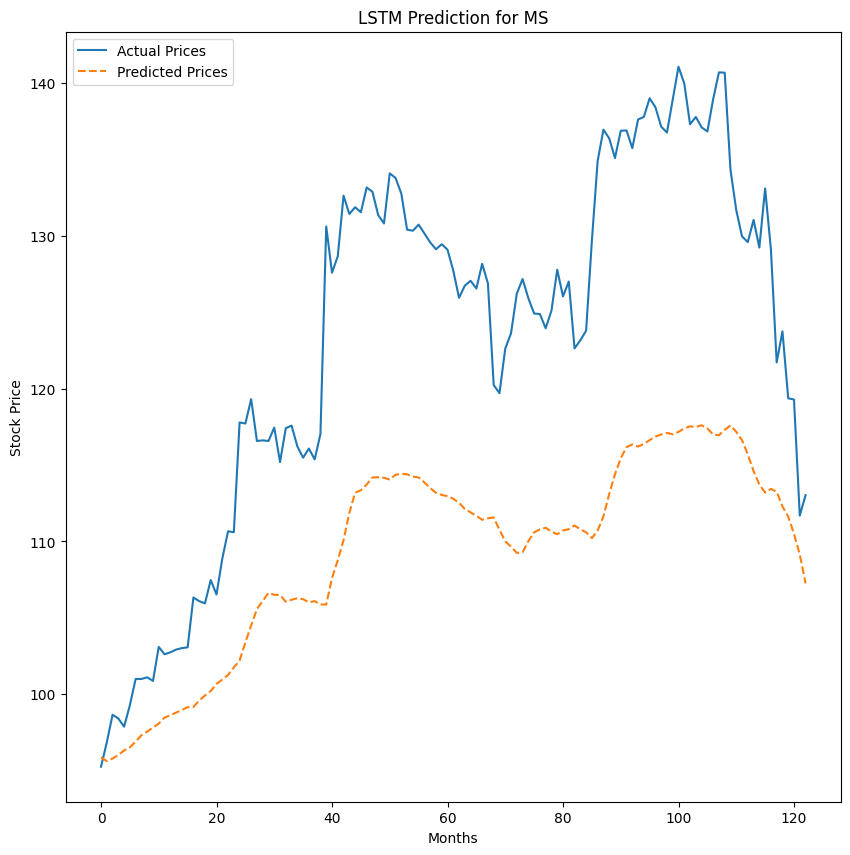

In [4]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load stock data
ticker = "MS"
stock = yf.Ticker(ticker)
df = stock.history(period="1y")  # Fetch last 1 year of data to reduce memory usage

# Use the closing price for prediction
df = df[['Close']]

# Scale the data
scaler = MinMaxScaler (feature_range=(0, 1))
df_scaled = scaler.fit_transform(df)

# Prepare the dataset for LSTM
def prepare_data(data, look_back=5):  # Reduce look_back to lower memory usage
    X, y = [], []
    for i in range(look_back, len(data)):
        X.append(data[i-look_back:i, 0])
        y.append(data[i, 0])
    X, y = np.array(X), np.array(y)
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))
    return X, y

look_back = 5  # Use fewer days to reduce dataset size
X, y = prepare_data(df_scaled, look_back)

# Split data into training and test sets


train_size = int(len(X) * 0.5)  # Reduce training size to 50%
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


# Build LSTM model with fewer units to optimize memory
model = Sequential([
    LSTM(units=10, return_sequences= False, input_shape=(look_back, 1)),
    Dense(units=1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with fewer epochs and a smaller batch size
model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

# Make predictions
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot results
plt.figure(figsize=(10,10))
plt.plot(y_test, label='Actual Prices')
plt.plot(y_pred, label='Predicted Prices', linestyle='dashed')
plt.legend()
plt.title(f"LSTM Prediction for {ticker}")
plt.xlabel("Months")
plt.ylabel("Stock Price")
plt.show()